In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

/Users/harrywiner/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Exercise 3: Clustering with K-Means
## Implement K-Means
Apply K-means clustering on the reduced dataset from PCA or t-SNE.

## Determine Optimal Clusters
Use methods like the elbow method to determine the optimal number of clusters.

## Visualize Clusters
Create visualizations to observe how different digits are clustered together.

# Exercise 4: Introduction to SVM
## Theory Understanding
Briefly explain the theory behind SVM and how it can be applied to the MNIST dataset.

## SVM Implementation
Use an SVM classifier to classify the digits. Start with default parameters.

## Evaluate SVM Model
Evaluate the performance of the model using metrics like accuracy, precision, and recall.

# Exercise 5: Model Improvement
## Data Preprocessing
Experiment with different preprocessing techniques, like normalization or standardization, and observe their effects on SVM performance.

## Hyperparameter Tuning
Use techniques like grid search or random search to find the best parameters for the SVM.

## Kernel Tricks
Experiment with different kernels (linear, RBF, polynomial) and observe their impact on the classification performance.

# Exercise 6: Comparative Analysis
## Implement a Different Classifier
Choose a different supervised learning classifier (e.g., Decision Tree, K-Nearest Neighbors) and apply it to the MNIST dataset.

## Compare with SVM
Compare the performance of this classifier with the SVM model. Discuss the pros and cons of each model.

# Exercise 7: Advanced Challenges
## Cross-Validation
Implement cross-validation on the SVM model to ensure its robustness.

## Error Analysis
Analyze the types of errors the model is making. Visualize and discuss the misclassified digits.

## Ensemble Learning
Experiment with ensemble methods (like Random Forests or Gradient Boosting) on the MNIST dataset.

# Exercise 8: Reflective Questions
## Insights Gained
What insights did you gain about the MNIST dataset through these exercises?

## Model Selection
Discuss why certain models performed better than others on this dataset.

## Real-world Application
How could these techniques be applied to other image classification tasks?

These exercises are designed to provide a hands-on approach to understanding both unsupervised and supervised learning techniques, with a particular focus on SVMs, through the practical lens of the MNIST dataset. Each exercise encourages not only the application of techniques but also critical thinking about the results and their implications.

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

# Exercise 1: Data Exploration
## Load the MNIST Dataset
Use a library like TensorFlow or Scikit-learn to load the MNIST dataset.

## Visualize the Data
Create visualizations of several images from the dataset. Plot a random sample of 10 digits.

## Statistical Analysis
Perform a statistical analysis of the dataset. Calculate the mean and standard deviation of the pixel values.

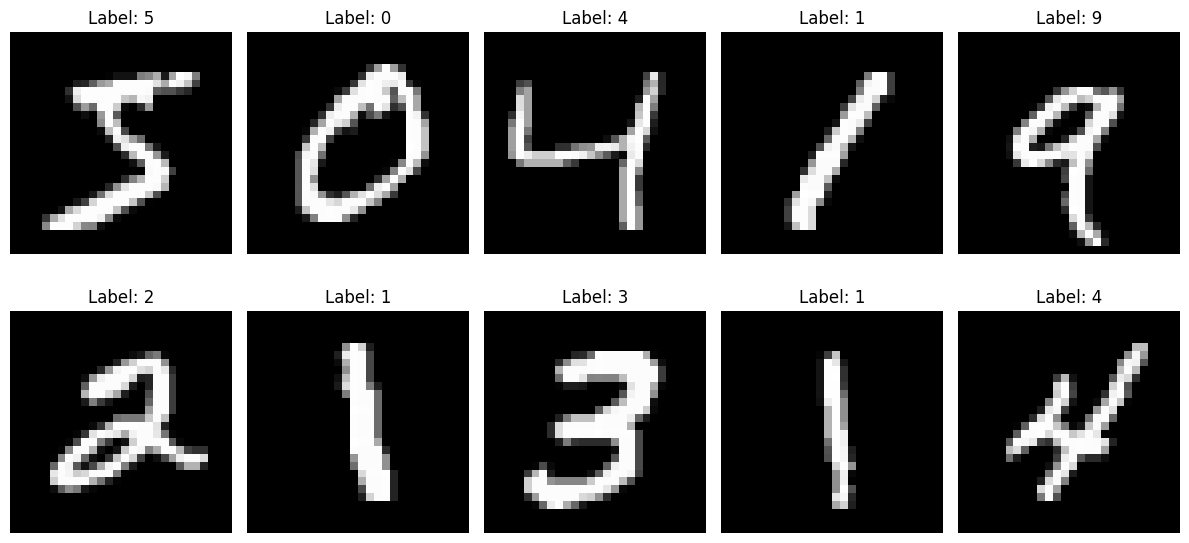

In [15]:
import matplotlib.pyplot as plt

# Create a figure with 10 subplots
fig, axs = plt.subplots(2, 5, figsize=(12, 6))

# Iterate over the first 10 images in x_train
for i in range(10):
    # Get the image and its label
    image = x_train[i]
    label = y_train[i]
    
    # Plot the image in the corresponding subplot
    ax = axs[i // 5, i % 5]
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


## Stats
Calculate the mean and the std of each of the pixels

In [16]:
x_train.shape

(60000, 28, 28)

In [51]:
def calculate_samples_mean_std(samples, title="of samples"):
    transform = samples.reshape(28, samples.shape[0], 28)
    means = transform.mean(axis=1)
    stds = transform.std(axis=1)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # means
    im1 = ax1.imshow(means)
    ax1.set_title(f"Mean {title}")
    fig.colorbar(im1, ax=ax1)

    # stds
    im2 = ax2.imshow(stds, cmap='plasma')
    ax2.set_title(f"std {title}")
    fig.colorbar(im2, ax=ax2)

    plt.show()
    pass

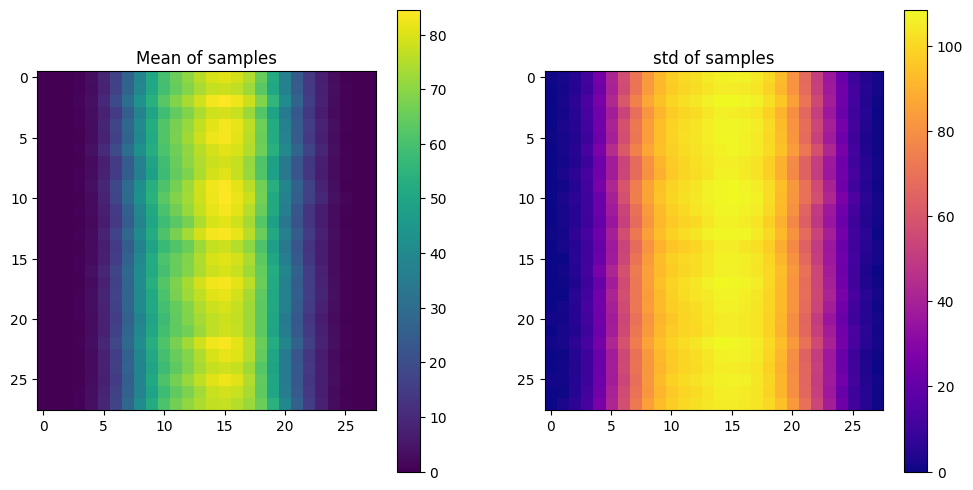

In [52]:
calculate_samples_mean_std(x_train)

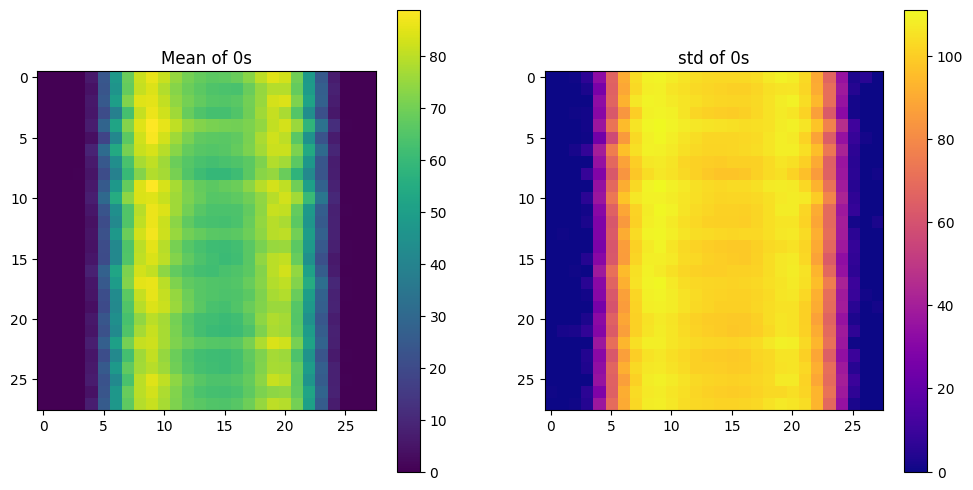

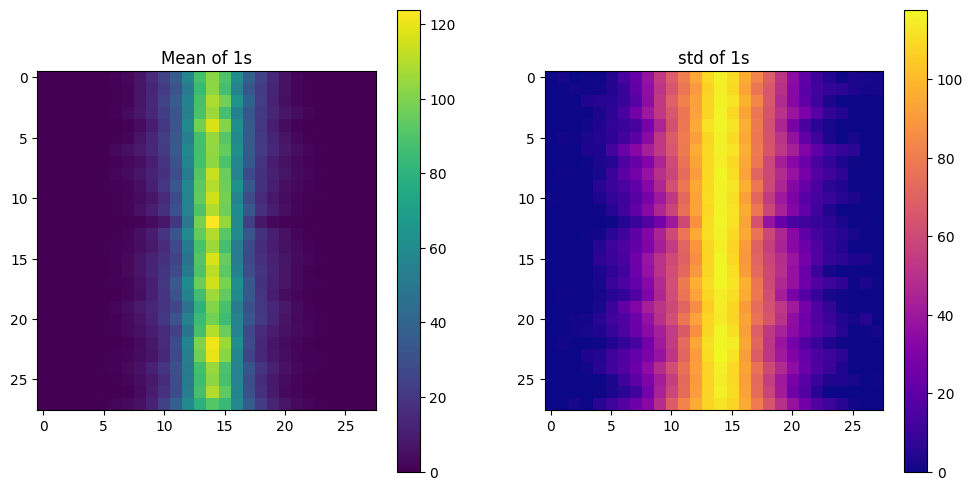

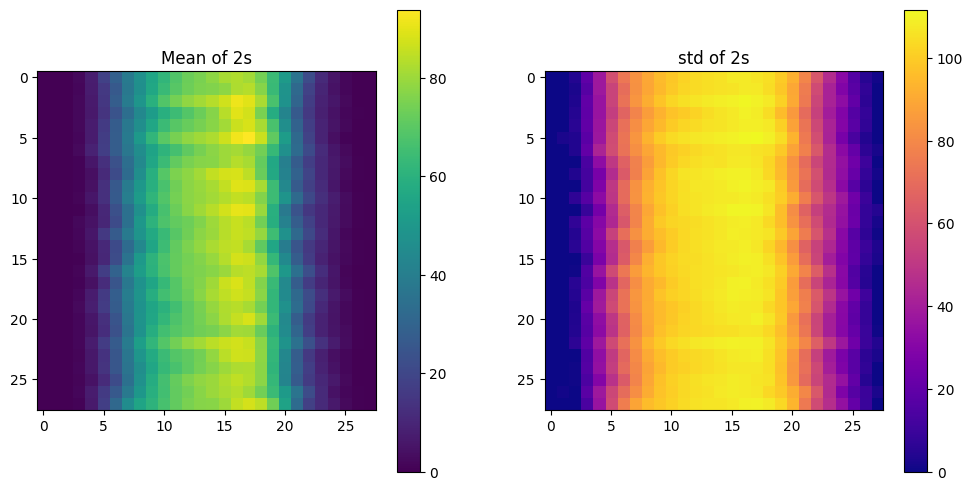

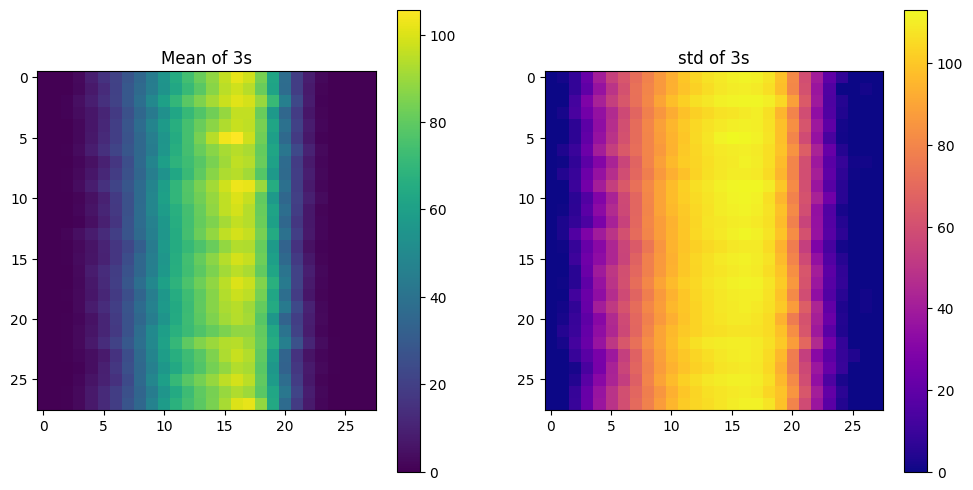

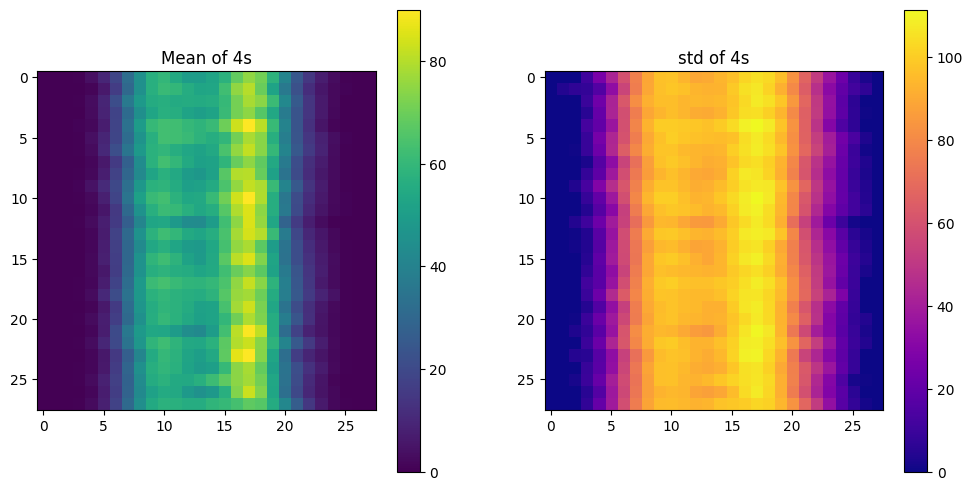

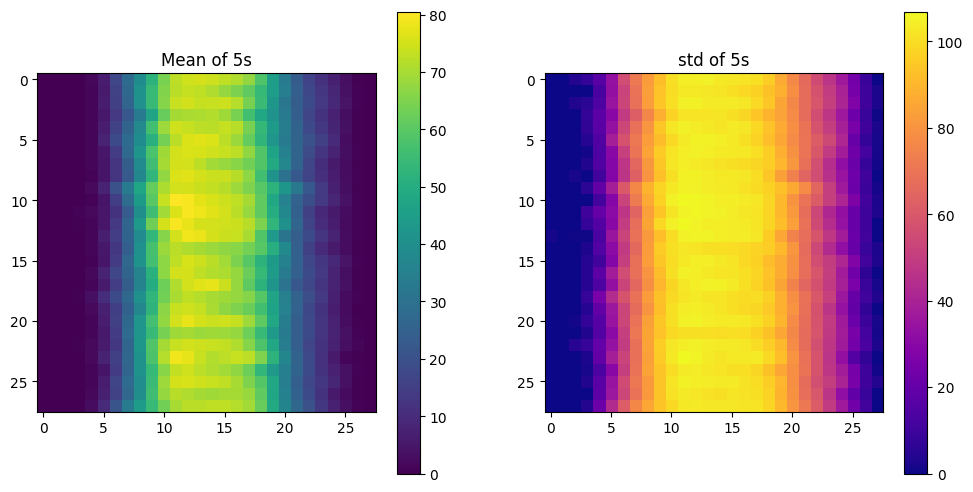

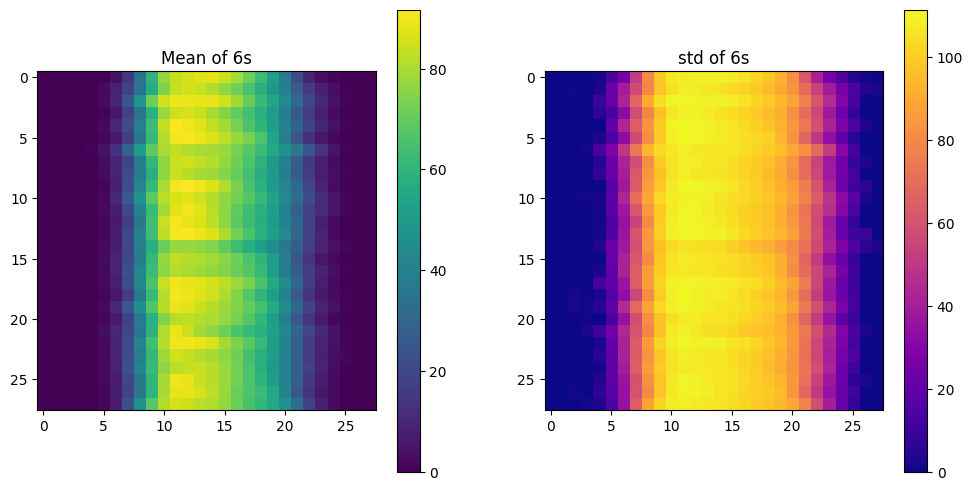

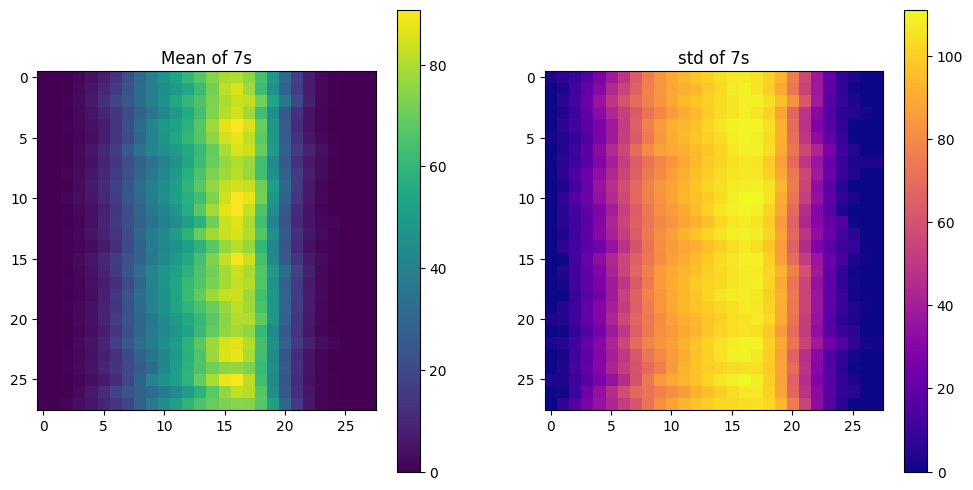

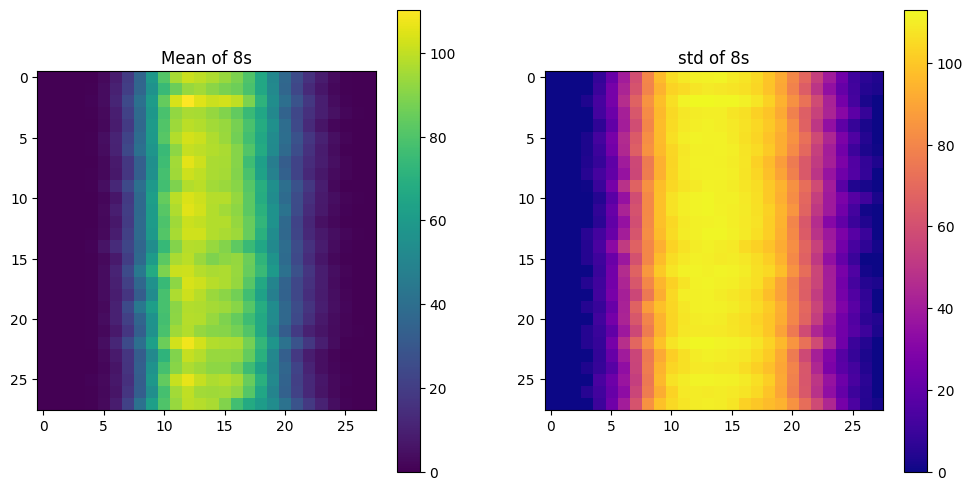

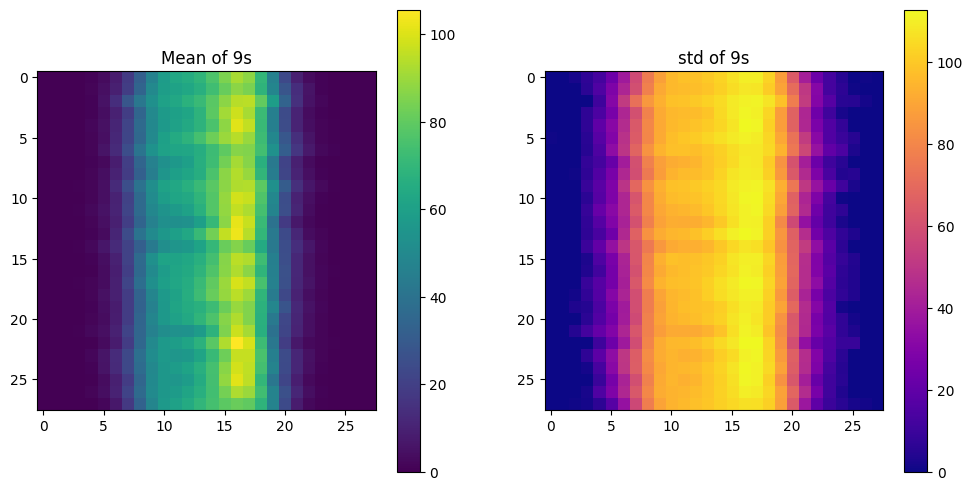

In [59]:
for i in range(10): 
    filtered_x_train = x_train[y_train == i]
    calculate_samples_mean_std(filtered_x_train, f"of {i}s")

# Exercise 2: Dimensionality Reduction
## PCA (Principal Component Analysis)
Apply PCA to reduce the dimensionality of the dataset. Visualize the variance explained by the principal components.

## t-SNE Visualization
Use t-SNE to visualize the MNIST data in two dimensions. Observe the clustering of similar digits.

In [68]:
from sklearn.decomposition import PCA

In [78]:
def apply_pca(x_train, y_train, show=True):
    # Perform PCA on x_train
    pca = PCA(n_components=100)
    x_train_pca = pca.fit_transform(x_train)

    # Get unique labels in y_train
    labels = np.unique(y_train)

    # Create a separate plot for each label
    if show:
        for label in labels:
            # Filter the data for the current label
            filtered_x_train = x_train_pca[y_train == label]

            # Plot the transformed data
            plt.figure(figsize=(8, 6))
            plt.scatter(filtered_x_train[:, 0], filtered_x_train[:, 1])
            plt.xlabel('Principal Component 1')
            plt.ylabel('Principal Component 2')
            plt.title(f'PCA Visualization for Label {label}')
            plt.show()
    
    return pca

In [80]:
x_train_pca = apply_pca(x_train.reshape(x_train.shape[0], -1), y_train, show=False)
print(sum(x_train_pca.explained_variance_ratio_))

0.9142724987610682


### T-SNE

In [82]:
from sklearn.manifold import TSNE

In [84]:
TSNE(n_components=2).fit_transform(x_train.reshape(x_train.shape[0], -1))

KeyboardInterrupt: 